In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Load

In [3]:
file_path = '/kaggle/input/manipulated-iris-dataset-for-beginners/iris_dirty.csv'
df = pd.read_csv(file_path, header=None)

# Add Headers

In [4]:
header = ['SpLn', 'SpWd', 'PtLn', 'PtWd', 'Species']

df.columns = header
df.head()

,SpLn,SpWd,PtLn,PtWd,Species
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


# Add Case ID

In [5]:
# Adding case_id as the first column
df.insert(0, "Case ID", range(1, len(df) + 1))

# Column PtWd issue

In [6]:
WdList = []

for i in range(0,len(df)):
    width = int(df['PtWd'][i][:-3])/10 #standardization (mm to cm unit conversion)
    WdList.append(width)

df['PtWd'] = WdList

# Save Prepared DataFrame

In [7]:
df.to_csv('iris_clean.csv', index=False)

# Dataset Exploration

In [8]:
# check data types: do all of your features have number type?

df.dtypes

Case ID      int64
SpLn       float64
SpWd       float64
PtLn       float64
PtWd       float64
Species     object
dtype: object

In [9]:
# data statistics

df.describe(include='all')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Case ID,SpLn,SpWd,PtLn,PtWd,Species
count,151.000000,151.000000,150.000000,151.000000,151.000000,151
unique,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,51
mean,76.000000,6.196689,3.057333,3.764901,1.200000,NaN
std,43.734045,4.324325,0.432776,1.760197,0.760789,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.500000,5.100000,2.800000,1.600000,0.300000,NaN
50%,76.000000,5.800000,3.000000,4.400000,1.300000,NaN
75%,113.500000,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Case ID  151 non-null    int64  
 1   SpLn     151 non-null    float64
 2   SpWd     150 non-null    float64
 3   PtLn     151 non-null    float64
 4   PtWd     151 non-null    float64
 5   Species  151 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# index=True

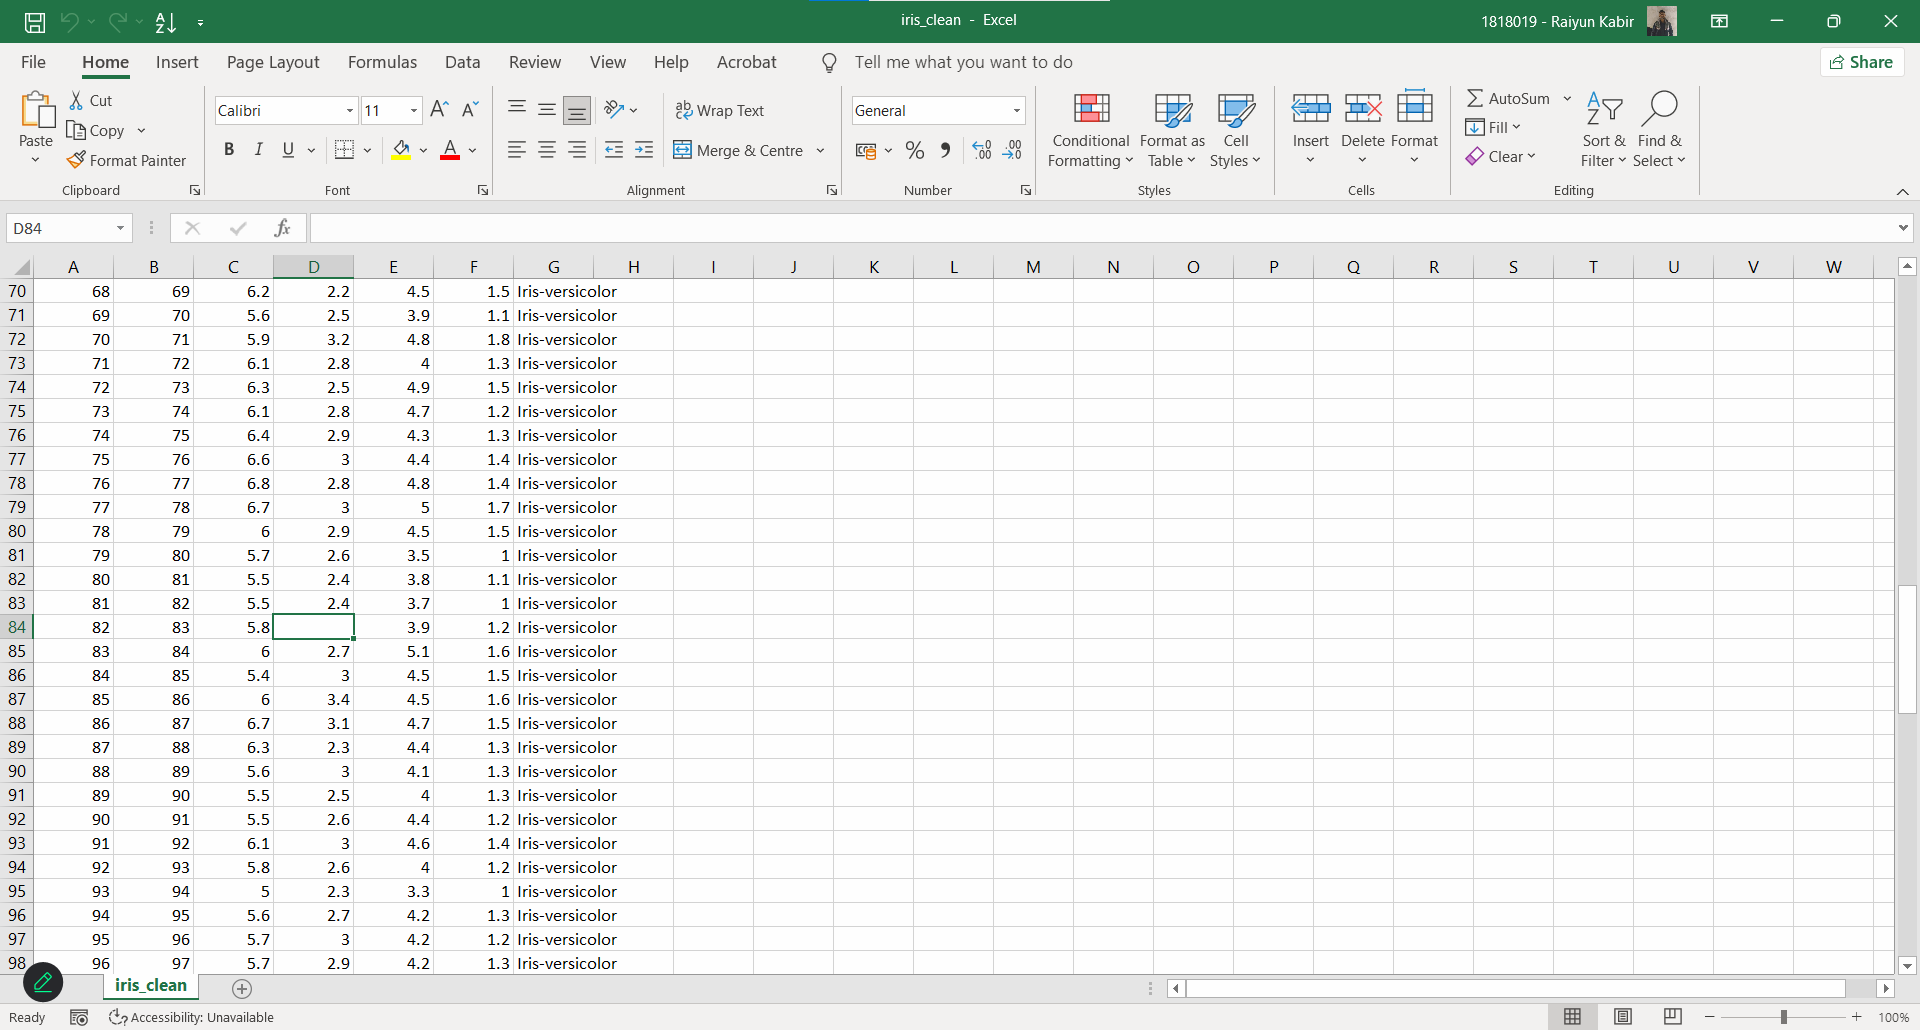

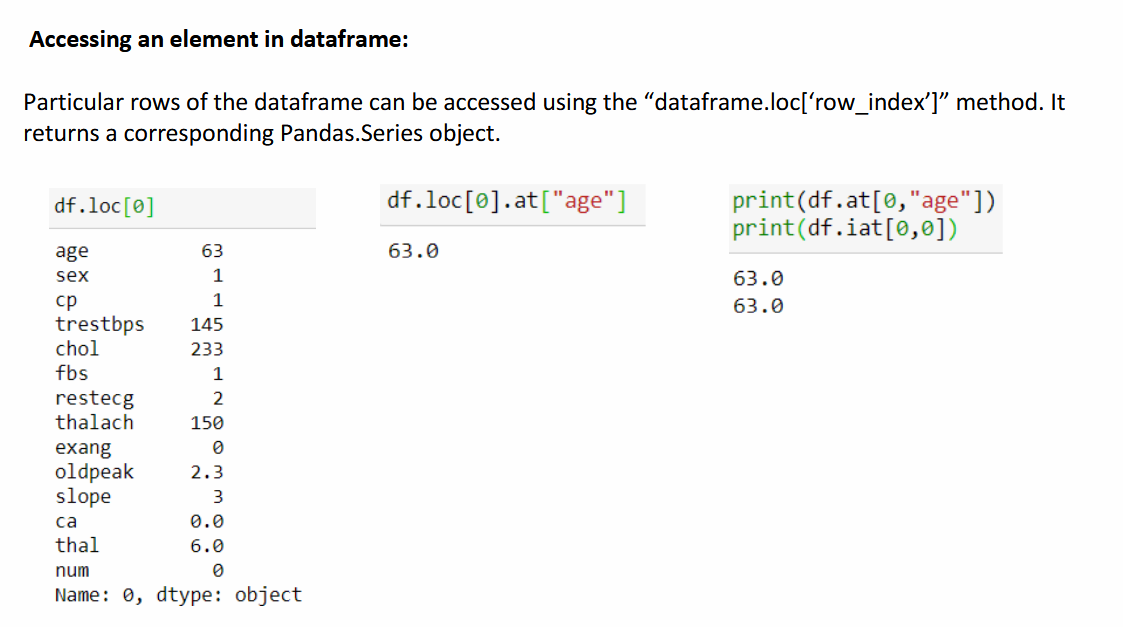

# Detecting Missing Entry

In [11]:
# check if any value is missing

df.isnull().values.any()

True

In [12]:
# find the missing ones

missing = df.isnull()

missing

,Case ID,SpLn,SpWd,PtLn,PtWd,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False
149,False,False,False,False,False,False


In [13]:
# find missing data column-wise

for column in missing.columns.values.tolist():
    print(f'{missing[column].value_counts()} \n')

Case ID
False    151
Name: count, dtype: int64 

SpLn
False    151
Name: count, dtype: int64 

SpWd
False    150
True       1
Name: count, dtype: int64 

PtLn
False    151
Name: count, dtype: int64 

PtWd
False    151
Name: count, dtype: int64 

Species
False    151
Name: count, dtype: int64 



# Dropping Faulty Data

In [14]:
df.dropna(subset=['SpWd'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Case ID  150 non-null    int64  
 1   SpLn     150 non-null    float64
 2   SpWd     150 non-null    float64
 3   PtLn     150 non-null    float64
 4   PtWd     150 non-null    float64
 5   Species  150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.to_csv('iris_prepared.csv', index=False)

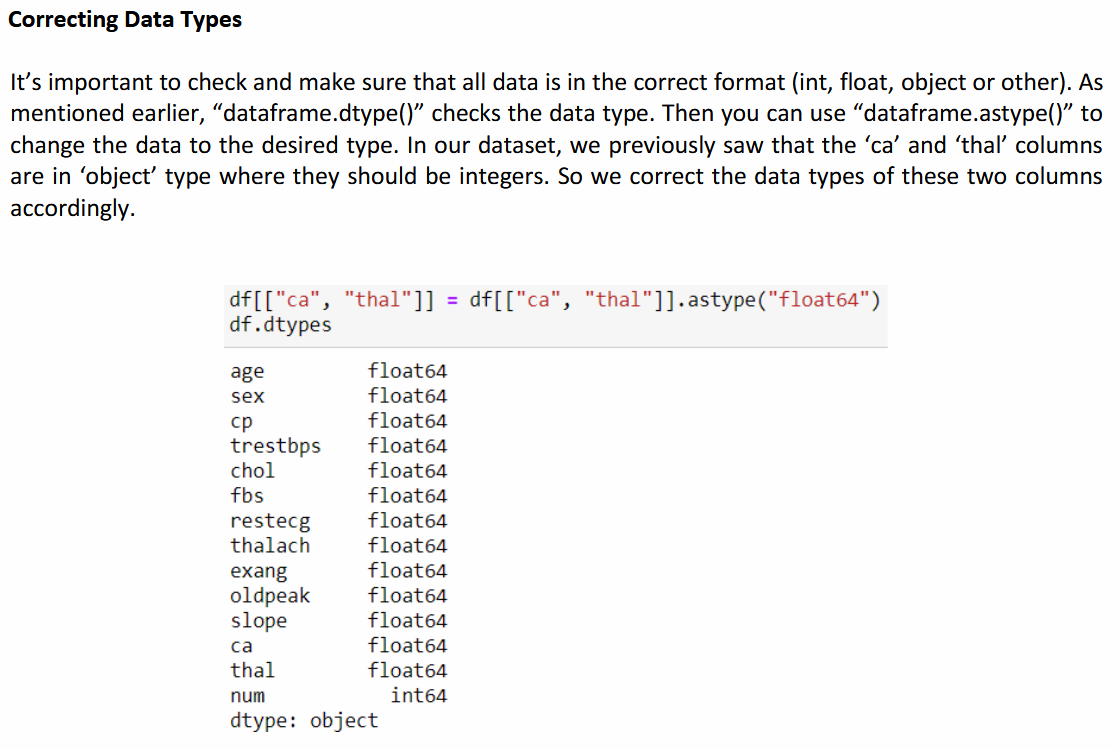

# Standardization and Normalization Lecture Note

https://drive.google.com/file/d/1kTcH3Zqyd7K-e-1yuVs-UIPry8wsTSMl/view?usp=drive_link

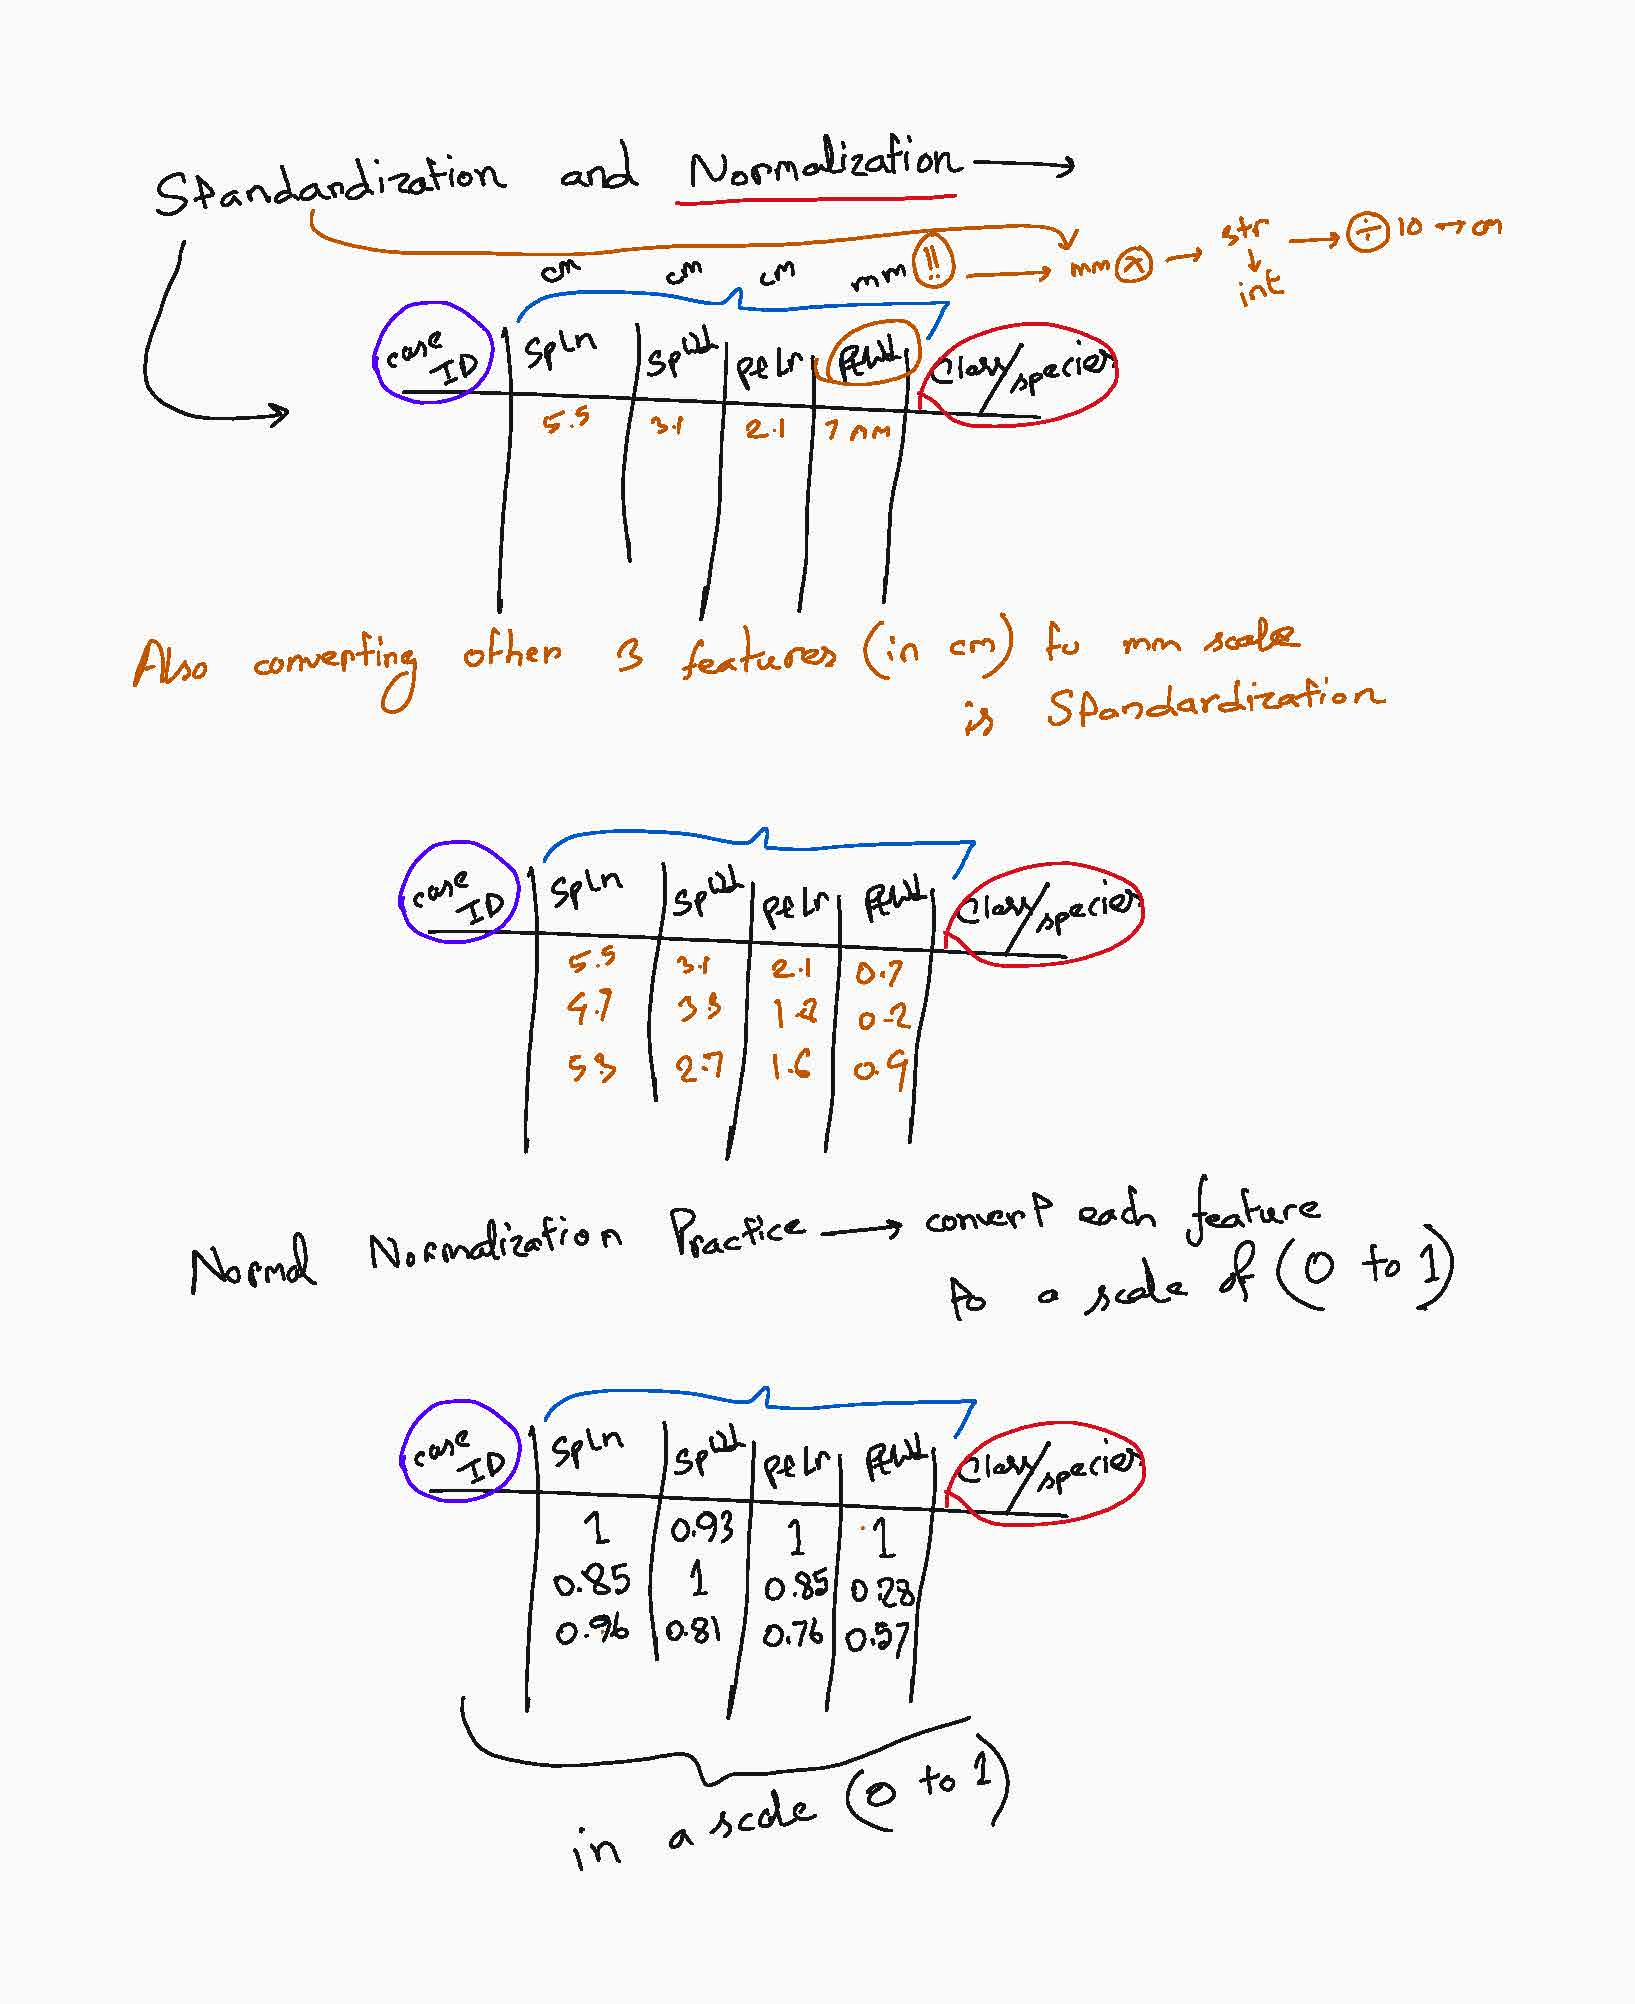

# Normalization

In [16]:
# columnwise normalization

df['SpLn'] = df['SpLn']/df['SpLn'].max()
df['SpWd'] = df['SpWd']/df['SpWd'].max()
df['PtLn'] = df['PtLn']/df['PtLn'].max()
df['PtWd'] = df['PtWd']/df['PtWd'].max()

df.head(15)

,Case ID,SpLn,SpWd,PtLn,PtWd,Species
0,1,0.087931,0.795455,0.202899,0.08,Iris-setosa
1,2,0.084483,0.681818,0.202899,0.08,Iris-setosa
2,3,0.081034,0.727273,0.188406,0.08,Iris-setosa
3,4,0.079310,0.704545,0.217391,0.08,Iris-setosa
4,5,0.086207,0.818182,0.202899,0.08,Iris-setosa
5,6,0.093103,0.886364,0.246377,0.16,Iris-setosa
6,7,0.079310,0.772727,0.202899,0.12,Iris-setosa
7,8,0.086207,0.772727,0.217391,0.08,Iris-setosa
8,9,0.075862,0.659091,0.202899,0.08,Iris-setosa
9,10,0.084483,0.704545,0.217391,0.04,Iris-setosa
